In [1]:
import cv2
import numpy as np

In [2]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [3]:
classes = []
with open("coco.names", "r") as f:
    classes = f.read().strip().split('\n')

In [4]:
cap = cv2.VideoCapture(0)

In [ ]:
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    height, width, _ = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers = net.getUnconnectedOutLayersNames()
    detections = net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []

    for detection in detections:
        for obj in detection:
            scores = obj[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                center_x = int(obj[0] * width)
                center_y = int(obj[1] * height)
                w = int(obj[2] * width)
                h = int(obj[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (0, 255, 0)  
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    cv2.imshow("Object Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

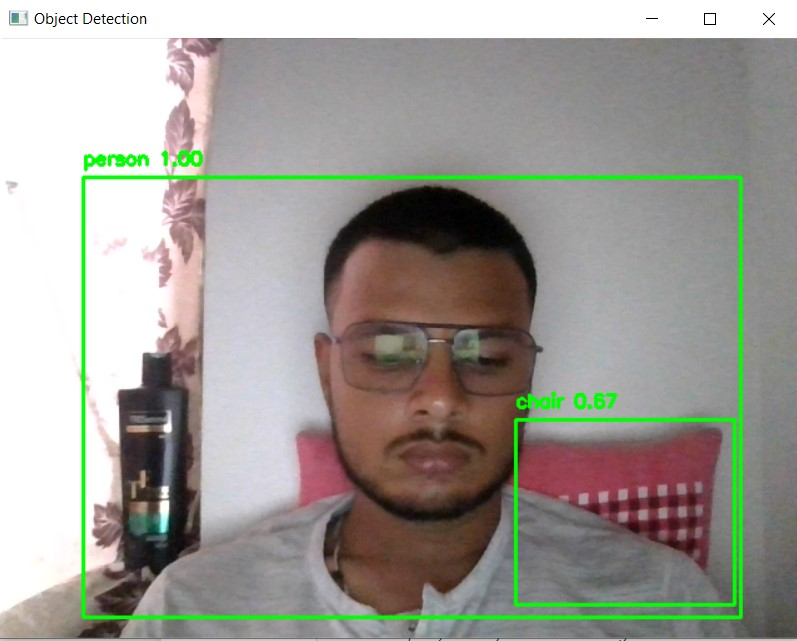